# NBM

This demonstrates using data from the National Blend of Models (NBM).

In [1]:
from herbie import Herbie
from toolbox import EasyMap, pc
from paint.standard2 import cm_tmp, cm_wind

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
H = Herbie("2022-05-01 12:00", model="nbm", fxx=1, product="co")

✅ Found ┊ model=nbm ┊ product=co ┊ 2022-May-01 12:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws


In [3]:
H.PRODUCTS

{'ak': 'Alaska; 13-km resolution',
 'co': 'CONUS 13-km resolution',
 'gu': 'Guam 13-km resolution',
 'hi': 'Hawaii 13-km resolution',
 'pr': 'Puerto Rico 13-km resolution'}

In [4]:
H.grib

'https://noaa-nbm-grib2-pds.s3.amazonaws.com/blend.20220501/12/core/blend.t12z.core.f001.co.grib2'

In [5]:
H.SOURCES

{'nomads': 'https://nomads.ncep.noaa.gov/pub/data/nccf/com/blend/prod/blend.20220501/12/core/blend.t12z.core.f001.co.grib2',
 'aws': 'https://noaa-nbm-grib2-pds.s3.amazonaws.com/blend.20220501/12/core/blend.t12z.core.f001.co.grib2'}

In [6]:
H.inventory(":TMP:2 m above ground:.*fcst$")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,?,??,search_this
53,54,67526627,68863209,67526627-68863209,2022-05-01 12:00:00,2022-05-01 13:00:00,TMP,2 m above ground,1 hour fcst,,,:TMP:2 m above ground:1 hour fcst


In [7]:
ds = H.xarray(":TMP:2 m above ground:.*fcst$")
ds

<xarray.Dataset>
Dimensions:              (y: 1597, x: 2345)
Coordinates:
    time                 datetime64[ns] 2022-05-01T12:00:00
    step                 timedelta64[ns] 01:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 ...
    longitude            (y, x) float64 ...
    valid_time           datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          14
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   nbm
    product:                 co
    description:             National Blend of Models
    remote_grib:             https://noaa-nbm-grib2-pds.s3.amazonaws.com/blen...
    local_grib:              C:\Users\blaylock\data\nbm\20220501\subset_6de47...
    search:            :TMP:2 m above ground:.*fcst$

Text(0.0, 1.0, 'NBM: CONUS 13-km resolution')

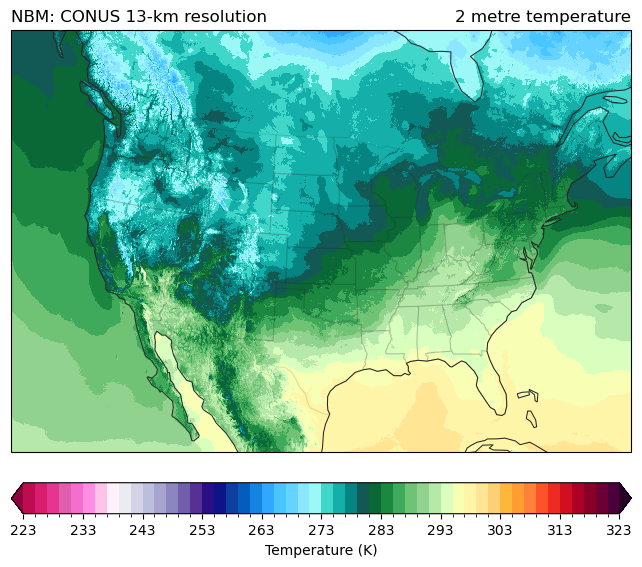

In [8]:
xvar = ds.t2m

ax = EasyMap(crs=ds.herbie.crs, figsize=[8, 8]).STATES().ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, xvar, transform=pc, **cm_tmp(units="K").cmap_kwargs
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **cm_tmp(units="K").cbar_kwargs
)

ax.set_title(xvar.GRIB_name, loc="right")
ax.set_title(f"{ds.model.upper()}: {H.product_description}", loc="left")

In [9]:
x = H.xarray("WIND:10 m.*$", verbose=True)

📇 Download subset: ▌▌Herbie NBM model co product initialized 2022-May-01 12:00 UTC F01 ┊ source=aws                                                            
 cURL from https://noaa-nbm-grib2-pds.s3.amazonaws.com/blend.20220501/12/core/blend.t12z.core.f001.co.grib2
  69  :WIND:10 m above ground:1 hour fcst
  72  :WIND:10 m above ground:1 hour fcst:ens std dev
💾 Saved the subset to C:\Users\blaylock\data\nbm\20220501\subset_6de44b0f__blend.t12z.core.f001.co.grib2


C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:1041: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")


Text(0.0, 1.0, 'NBM: CONUS 13-km resolution')

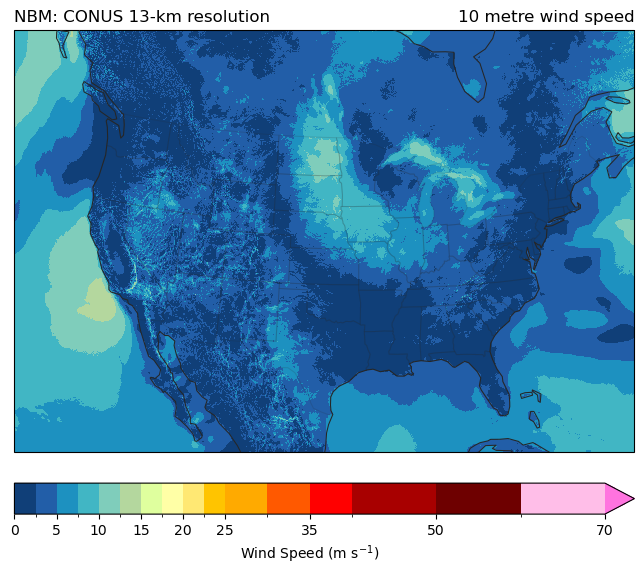

In [10]:
xvar = x.si10

ax = EasyMap(crs=x.herbie.crs, figsize=[8, 8]).STATES().ax
p = ax.pcolormesh(x.longitude, x.latitude, xvar, transform=pc, **cm_wind().cmap_kwargs)
plt.colorbar(p, ax=ax, orientation="horizontal", pad=0.05, **cm_wind().cbar_kwargs)

ax.set_title(xvar.GRIB_name, loc="right")
ax.set_title(f"{x.model.upper()}: {H.product_description}", loc="left")

In [11]:
H.inventory("^:TMP:2 m .*1 hour fcst$")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,?,??,search_this
53,54,67526627,68863209,67526627-68863209,2022-05-01 12:00:00,2022-05-01 13:00:00,TMP,2 m above ground,1 hour fcst,,,:TMP:2 m above ground:1 hour fcst
